In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

## 首先实现一对多分类  
### 第一步 首先读取matlab格式的数据文件，存到DataFrame数据结构中  
matlab文件中存储了两个矩阵X和y，通过loadmat函数转换为numpy的ndarray数据类型。X矩阵对应5000条数据的数据集，每条数据是一个20*20的灰度图像，用行向量的形式存储；y对应每个图像的分类结果

In [5]:
data = loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [89]:
X=data['X']
y=data['y']
X.shape, y.shape

((5000, 400), (5000, 1))

### 数据文件可视化

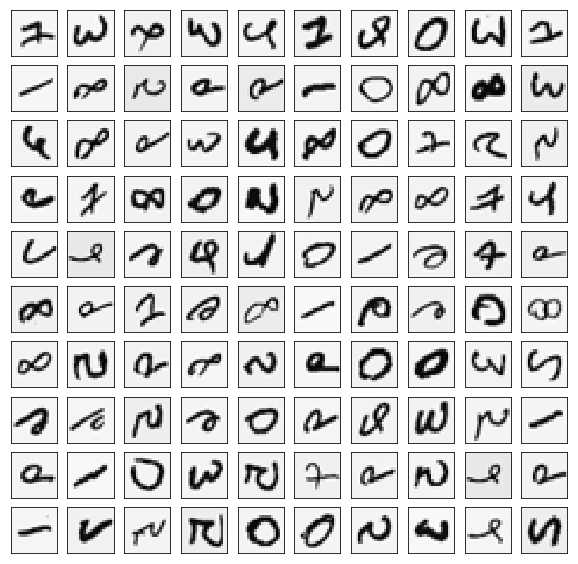

[4] [3] [8] [3] [2] [4] [2] [10] [3] [4] 

[1] [8] [5] [9] [9] [1] [10] [8] [8] [3] 

[2] [8] [9] [3] [2] [8] [10] [4] [9] [5] 

[9] [4] [8] [10] [5] [5] [8] [8] [4] [2] 

[7] [2] [6] [2] [2] [10] [1] [6] [4] [9] 

[8] [9] [4] [6] [8] [1] [6] [6] [10] [8] 

[8] [5] [9] [8] [5] [9] [10] [10] [3] [2] 

[6] [6] [5] [6] [10] [9] [2] [3] [5] [1] 

[9] [1] [10] [3] [5] [4] [9] [5] [2] [9] 

[1] [7] [5] [5] [10] [10] [5] [3] [2] [2] 



In [33]:
fig, ax = plt.subplots(10,10,figsize=(10, 10))
sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 在400的范围内生成100个随机数
sample_images = X[sample_idx, :]
sample_ys = y[sample_idx, :]
for i in range(10):
    for j in range(10):
        image = sample_images[10*i+j].reshape((20, 20))
        ax[i][j].matshow(image, cmap=plt.cm.binary)
        ax[i][j].set_xticks(np.array([]))  # just get rid of ticks
        ax[i][j].set_yticks(np.array([]))
plt.show()
for i in range(10):
    for j in range(10):
        print(sample_ys[10*i+j],end=' ')
    print('\n')
   

### 定义SIGMOID函数  
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： $$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$ 合起来，我们得到逻辑回归模型的假设函数： $${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$

In [80]:
def sigmoid( x ):  #注意，参数x可以为一个数，也可以是ndarray
    return 1 / ( 1 + np.exp ( - x) )

### 定义逻辑回归的代价函数  
注意：X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为列向量，y为列向量

In [81]:
def ComputeCost(X,theta,y): #X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为行向量，y为列向量
    first = np.multiply( -y, np.log(sigmoid(X*theta)))
    second = np.multiply( 1-y, np.log( 1-sigmoid(X*theta)))
    return  np.sum(first - second)/len(X)


### batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta \right)$$
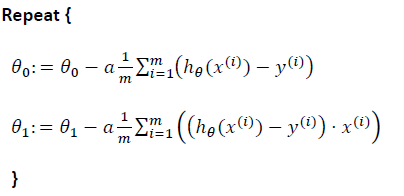  

注意：  
1) X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为列向量，y为列向量  
2) 和前两个例子中的梯度下降函数的区别是用向量化的方法X.T*error，之前的例子中是用循环实现的

In [82]:
def gradientDescent(X, y, theta, alpha, iters):#X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为行向量，y为列向量。alpha为学习率，iters为迭代次数
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)     #记录每次的代价值
    for i in range(iters):
        error = sigmoid(X*theta) -y
        temp = theta - X.T*error*alpha/len(X)
        theta =  temp
        cost[i] = ComputeCost(X,theta,y)
    return theta,cost

### 实现单分类器

In [223]:
X=data['X']
y=data['y']
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)      #插入了第一列（全部为1）
#将X，y转换为numpy中的matrix,theta也初始化为matrix
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.zeros(X.shape[1])).T
alpha = 0.1
iters = 100

In [206]:
def train( number,X,y,theta,alpha,iters ):  #训练对应数字number的分类器
    y = y.A      #将y转换成ndarray
    y_num = np.array([1 if label == number else 0 for label in y])
    y = np.matrix(y_num).T
    final_theta,cost = gradientDescent(X, y, theta, alpha, iters)
    return final_theta
def train_all( X,y,theta,alpha,iters ):  #训练所有的分类器,返回所有分类器对应的theta，包括k行，每行为行向量形式的theta
    thetaAll = np.zeros(shape=(11,theta.shape[0]))
    for i in range(1,11):
        thetaAll[i] = train(i,X,y,theta,alpha,iters).T.A
    return np.matrix(thetaAll)
        
def predict( New,X,y,theta,alpha,iters):  #New是待分类的数据，为1*401的行向量,包括添加的第一列1，为matrix类型，返回分类结果和可能性
    prob = 0
    thetaAll = train_all( X,y,theta,alpha,iters )
    for i in range(1,11):
        prob_num = sigmoid(New*thetaAll[i].T)
        if prob_num>= prob:
            prob = prob_num
            max_num = i
    return max_num,prob


### 输出预测并为预测精度打分


In [217]:
def predictAll(X,y,theta,alpha,iters):  #返回所有数据的预测值和可能性,返回值为列表
    thetaAll = train_all( X,y,theta,alpha,iters )
    result =  sigmoid(X*thetaAll.T)
    result = result[:,1:].A   #后面10列是有用的信息
    idx = np.argmax(result, axis=1)+1 #每行最大值的下标，+1是对应的预测值
    pro = np.amax(result, axis=1)   #每行最大值
    return idx,pro
def accuracy( idx,y):  #输入值为列表类型
    correct = [1 if (a == b) else 0 for (a, b) in zip(idx, y)]      #注意学习此处语法
    accuracy = sum(correct) / len(correct)
   

使用预测函数预测数据集中每一个数据，并为预测精度打分

In [228]:
idx,pro = predictAll(X,y,theta,alpha,iters)
idx = idx.tolist()

#accuracy =  accuracy(idx ,y)
#print ('accuracy = {}%'.format(accuracy*100))


list

## 正则化逻辑回归  
首先载入数据

In [57]:
CSV_FILE_PATH = 'ex2data2.txt'
df = pd.read_csv(CSV_FILE_PATH,header=None)
df = df.rename(columns = {0:'Test1',1:'Test2',2:'Accepted'})
#df = pd.read_csv(CSV_FILE_PATH,header=None, names=['score of exam1', 'score of exam2', 'Admission'])
df.describe()          #从数据分布看到不需要归一化

,Test1,Test2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


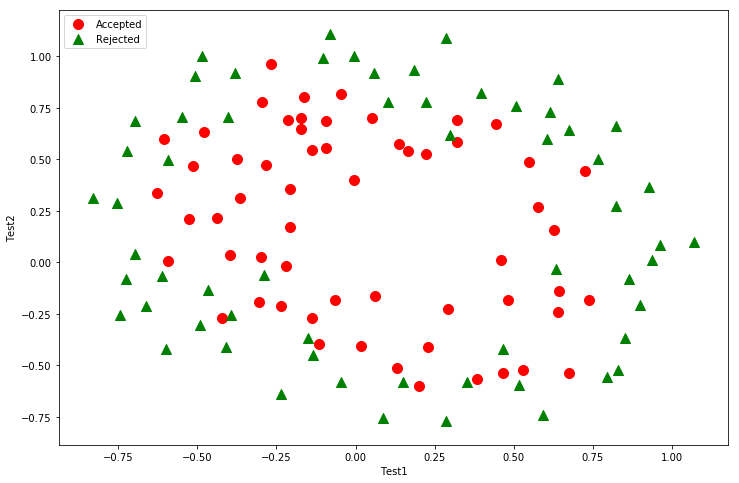

In [58]:
positive = df[df['Accepted'].isin([1])]    #根据Admission列的值筛选数据
negative = df[df['Accepted'].isin([0])]
plt.figure(figsize=(12,8))
plt.scatter(positive['Test1'], positive['Test2'], s=100,c='r',marker='o',label='Accepted')
plt.scatter(negative['Test1'], negative['Test2'], s=100,c='g',marker='^', label='Rejected')
plt.legend(loc=2)               #在左上角展示图例
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.show()

In [59]:
degree = 5     #修改数据集，包含x的高次项数值,
x1 = df['Test1']
x2 = df['Test2']

df.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i+1):
        df['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)       #注意：不需要先添加列，直接通过赋值添加列

df.drop('Test1', axis=1, inplace=True)   #inplace=True会改变原数据
df.drop('Test2', axis=1, inplace=True)

df.head()

,Accepted,Ones,F10,F11,F20,F21,F22,F30,F31,F32,F33,F40,F41,F42,F43,F44
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,0.000007,0.000094,0.001286,0.017551,0.239497
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,0.000074,-0.000546,0.004035,-0.029801,0.220095
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,0.002086,-0.006757,0.021886,-0.070895,0.229642
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,0.019775,-0.026483,0.035465,-0.047494,0.063602
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,0.069393,-0.062956,0.057116,-0.051818,0.047011


In [60]:
def sigmoid( x ):  #注意，参数x可以为一个数，也可以是ndarray
    return 1 / ( 1 + np.exp ( - x) )


## regularized cost（正则化代价函数）
$$J\left( \theta \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$


In [61]:
def ComputeCost(X,theta,y,numda): #X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为行向量，y为列向量
    first = np.multiply( -y, np.log(sigmoid(X*theta.T)))
    second = np.multiply( 1-y, np.log( 1-sigmoid(X*theta.T)))
    reg = (numda / (2 * len(X))) * np.sum(np.power(theta, 2))
    return  np.sum(first - second)/len(X) + reg

## 正则化梯度函数：

梯度下降算法将分两种情形： ${{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{{0}}^{(i)}}  $

 ${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$


In [68]:
def gradientDescent(X, y, theta, alpha, iters,numda):#X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为行向量，y为列向量。alpha为学习率，iters为迭代次数
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)     #记录每次的代价值
    for i in range(iters):
        error = sigmoid(X*theta.T) -y
        for j in range(theta.shape[1]):
            data = np.multiply(error,X[:,j])
            if (j==0):
                temp[0,j] = theta[0,j] - alpha * (np.sum(data) / len(X))
            else:
                temp[0,j] = theta[0,j]*(1-alpha*numda/len(X))- alpha * (np.sum(data) / len(X))
        theta = temp    
        cost[i] = ComputeCost(X,theta,y,numda)
    return theta,cost

In [63]:
X = df.iloc[:,1:]     #X为第2列到最后一列的值
y = df.iloc[:,0:1]    #y为第一列的值
#将X，y转换为numpy中的matrix,theta也初始化为matrix
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(15))

In [77]:
alpha = 1
iters = 1000
numda = 1    #通过调整这个参数实现正则化

In [78]:
g,cost = gradientDescent(X,y,theta,alpha,iters,numda)
g

matrix([[ 1.28774208,  0.56744213,  1.1184087 , -2.20671391, -0.92834607,
         -1.62520867, -0.03661411, -0.36907088, -0.33634424, -0.47661336,
         -1.67874467, -0.0598562 , -0.62664523, -0.26314793, -1.5485206 ]])

In [79]:
ComputeCost(X,g,y,numda)

0.5506639380994643

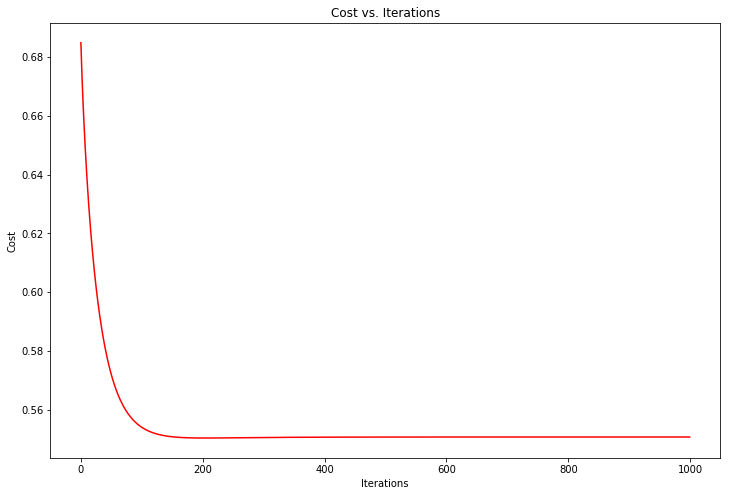

In [80]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(iters), cost, 'r', label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')

plt.show()

In [81]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]    #返回的是一个列表，对应每个数据的预测值

predictions = predict(g, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]      #注意学习此处语法
accuracy = sum(correct) / len(correct)
print ('accuracy = {}%'.format(accuracy*100))

accuracy = 82.20338983050848%
